In [1]:
import pandas as pd

# 索引

## query方法

把字符串形式的查询表达式传入query方法来查询数据

在query表达式中，帮用户注册了所有来自DataFrame的列名，所有属于该Series的方法都可以被调用，和正常的函数调用并没有区别



In [3]:
df = pd.read_csv("data/learn_pandas.csv", usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
df.head()


,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


In [4]:
# 之前使用loc进行的复杂索引
df[(df.School == "Peking University") & (df.Grade == "Freshman" )]

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
32,Peking University,Freshman,Gaopeng Shi,Female,48.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N
36,Peking University,Freshman,Xiaojuan Qin,Male,79.0,Y
38,Peking University,Freshman,Qiang Han,Male,87.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
54,Peking University,Freshman,Xiaojuan Chu,Male,58.0,Y
57,Peking University,Freshman,Changquan Chu,Female,45.0,N
88,Peking University,Freshman,Xiaopeng Han,Female,53.0,N
96,Peking University,Freshman,Changmei Feng,Female,56.0,N


In [6]:
# loc传入函数
def cond(x):
    condition1 = x.School == "Peking University"
    condition2 = x.Grade == "Freshman"
    res = condition1 & condition2
    return res

df.loc[cond]


,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
32,Peking University,Freshman,Gaopeng Shi,Female,48.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N
36,Peking University,Freshman,Xiaojuan Qin,Male,79.0,Y
38,Peking University,Freshman,Qiang Han,Male,87.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
54,Peking University,Freshman,Xiaojuan Chu,Male,58.0,Y
57,Peking University,Freshman,Changquan Chu,Female,45.0,N
88,Peking University,Freshman,Xiaopeng Han,Female,53.0,N
96,Peking University,Freshman,Changmei Feng,Female,56.0,N


现在使用query:把字符串形式的查询表达式传入query方法来查询数据

In [7]:
df.query("(School == 'Peking University')&"
         "(Grade == 'Freshman')")

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
32,Peking University,Freshman,Gaopeng Shi,Female,48.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N
36,Peking University,Freshman,Xiaojuan Qin,Male,79.0,Y
38,Peking University,Freshman,Qiang Han,Male,87.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
54,Peking University,Freshman,Xiaojuan Chu,Male,58.0,Y
57,Peking University,Freshman,Changquan Chu,Female,45.0,N
88,Peking University,Freshman,Xiaopeng Han,Female,53.0,N
96,Peking University,Freshman,Changmei Feng,Female,56.0,N


In [8]:
# 在query表达式中，帮用户注册了所有来自DataFrame的列名，所有属于该Series的方法都可以被调用，和正常的函数调用并没有区别
df.query("Weight > Weight.mean()").head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
10,Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
14,Tsinghua University,Senior,Xiaomei Zhou,Female,57.0,N


对于含有空格的列名，需要使用`` `col name` ``的方式进行引用。

同时，在`query`中还注册了若干英语的字面用法，帮助提高可读性，例如：`or, and, or, in, not in`。

In [10]:
df.query("(Grade not in ['Freshman','Sophomore']) and (Gender=='Male')").head()

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
16,Tsinghua University,Junior,Xiaoqiang Qin,Male,68.0,N
17,Tsinghua University,Junior,Peng Wang,Male,65.0,N
18,Tsinghua University,Senior,Xiaofeng Sun,Male,71.0,N
21,Shanghai Jiao Tong University,Senior,Xiaopeng Shen,Male,62.0,NaN


此外，在字符串中出现与列表的比较时，`==`和`!=`分别表示元素出现在列表和没有出现在列表，等价于`in`和`not in`

In [11]:
# 查询所有大三和大四的学生
df.query("Grade == ['Junior', 'Senior']").head()

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
7,Tsinghua University,Junior,Gaoqiang Qian,Female,50.0,N
9,Peking University,Junior,Juan Xu,Female,NaN,N
11,Tsinghua University,Junior,Xiaoquan Lv,Female,43.0,N
12,Shanghai Jiao Tong University,Senior,Peng You,Female,48.0,NaN


对于`query`中的字符串，如果要引用外部变量，只需在变量名前加`@`符号

In [12]:
# 取出体重位于70kg到80kg之间的学生
low, high = 70, 80
df.query('(Weight >= @low) & (Weight <= @high)').head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
10,Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
18,Tsinghua University,Senior,Xiaofeng Sun,Male,71.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N


# 多级索引

In [14]:
# 构造一张表
import numpy as np
np.random.seed(0)
multi_index = pd.MultiIndex.from_product([list('ABCD'), df.Gender.unique()], names=('School', 'Gender'))
multi_column = pd.MultiIndex.from_product([['Height', 'Weight'], df.Grade.unique()], names=('Indicator', 'Grade'))
df_multi = pd.DataFrame(np.c_[(np.random.randn(8,4)*5 + 163).tolist(), (np.random.randn(8,4)*5 + 65).tolist()],
                        index = multi_index, columns = multi_column).round(1)
df_multi

Indicator       Height                           Weight                   \
Grade         Freshman Senior Sophomore Junior Freshman Senior Sophomore   
School Gender                                                              
A      Female    171.8  165.0     167.9  174.2     60.6   55.1      63.3   
       Male      172.3  158.1     167.8  162.2     71.2   71.0      63.1   
B      Female    162.5  165.1     163.7  170.3     59.8   57.9      56.5   
       Male      166.8  163.6     165.2  164.7     62.5   62.8      58.7   
C      Female    170.5  162.0     164.6  158.7     56.9   63.9      60.5   
       Male      150.2  166.3     167.3  159.3     62.4   59.1      64.9   
D      Female    174.3  155.7     163.2  162.1     65.3   66.5      61.8   
       Male      170.7  170.3     163.8  164.9     61.6   63.2      60.9   

Indicator             
Grade         Junior  
School Gender         
A      Female   65.8  
       Male     63.5  
B      Female   74.8  
       Male     68.9  
C      Female   66.9  
       Male     67.1  
D      Female   63.2  
       Male     56.4

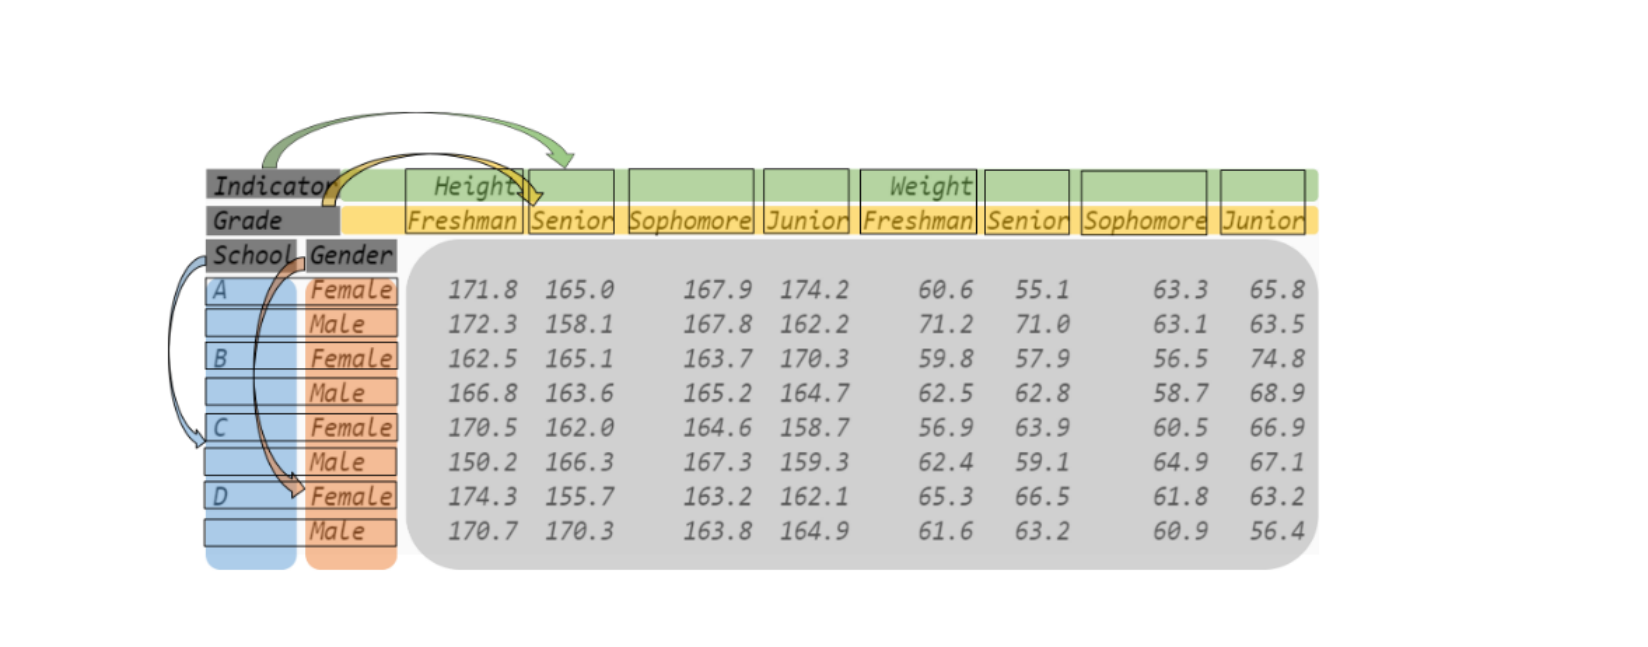

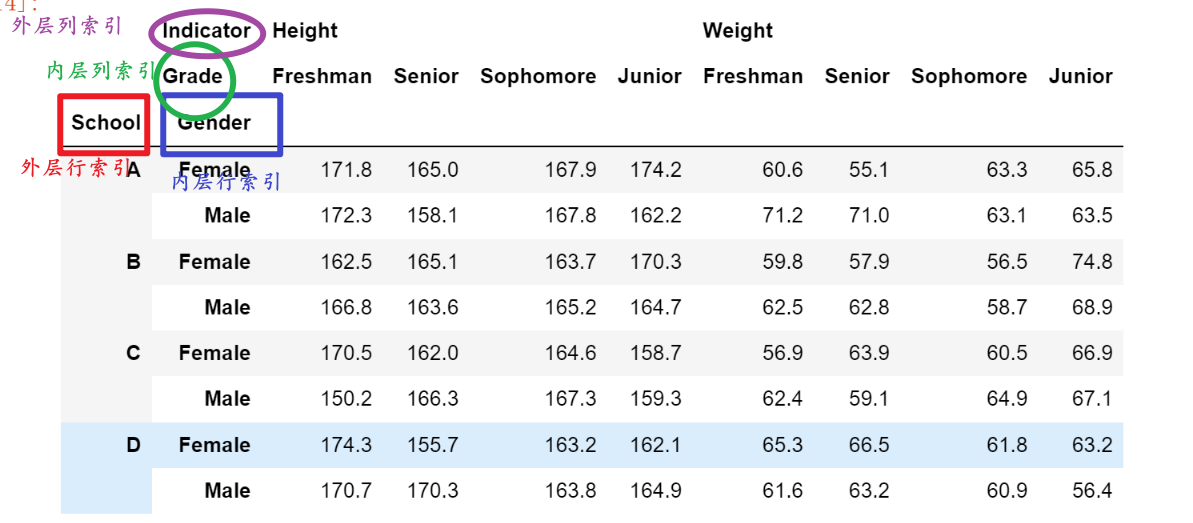

这里的行索引和列索引都是`MultiIndex`类型，只不过**索引中的一个元素是元组**而不是单层索引中的标量。例如，行索引的第四个元素为`("B", "Male")`，列索引的第二个元素为`("Height", "Senior")`

In [15]:
df_multi.index

MultiIndex([('A', 'Female'),
            ('A',   'Male'),
            ('B', 'Female'),
            ('B',   'Male'),
            ('C', 'Female'),
            ('C',   'Male'),
            ('D', 'Female'),
            ('D',   'Male')],
           names=['School', 'Gender'])

In [16]:
df_multi.columns

MultiIndex([('Height',  'Freshman'),
            ('Height',    'Senior'),
            ('Height', 'Sophomore'),
            ('Height',    'Junior'),
            ('Weight',  'Freshman'),
            ('Weight',    'Senior'),
            ('Weight', 'Sophomore'),
            ('Weight',    'Junior')],
           names=['Indicator', 'Grade'])

索引的名字和值属性分别可以通过`names`和`values`获得

In [19]:
df_multi.index.names,df_multi.columns.names

(FrozenList(['School', 'Gender']), FrozenList(['Indicator', 'Grade']))

In [20]:
df_multi.index.values, df_multi.columns.values

(array([('A', 'Female'), ('A', 'Male'), ('B', 'Female'), ('B', 'Male'),
        ('C', 'Female'), ('C', 'Male'), ('D', 'Female'), ('D', 'Male')],
       dtype=object),
 array([('Height', 'Freshman'), ('Height', 'Senior'),
        ('Height', 'Sophomore'), ('Height', 'Junior'),
        ('Weight', 'Freshman'), ('Weight', 'Senior'),
        ('Weight', 'Sophomore'), ('Weight', 'Junior')], dtype=object))

如果想要得到某一层的索引，则需要通过`get_level_values`获得

In [23]:
df_multi.index.get_level_values(0) # 0-外层行索引

Index(['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'], dtype='object', name='School')

In [24]:
df = pd.read_csv("data/learn_pandas.csv")
df.head()


,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [25]:
# 设置行索引,此时的School和Grade都加粗了
df_multi = df.set_index(["School", "Grade"])
df_multi.head()

Name  Gender  Height  \
School                        Grade                                       
Shanghai Jiao Tong University Freshman     Gaopeng Yang  Female   158.9   
Peking University             Freshman   Changqiang You    Male   166.5   
Shanghai Jiao Tong University Senior            Mei Sun    Male   188.9   
Fudan University              Sophomore    Xiaojuan Sun  Female     NaN   
                              Sophomore     Gaojuan You    Male   174.0   

                                         Weight Transfer  Test_Number  \
School                        Grade                                     
Shanghai Jiao Tong University Freshman     46.0        N            1   
Peking University             Freshman     70.0        N            1   
Shanghai Jiao Tong University Senior       89.0        N            2   
Fudan University              Sophomore    41.0        N            2   
                              Sophomore    74.0        N            2   

                                         Test_Date Time_Record  
School                        Grade                             
Shanghai Jiao Tong University Freshman   2019/10/5     0:04:34  
Peking University             Freshman    2019/9/4     0:04:20  
Shanghai Jiao Tong University Senior     2019/9/12     0:05:22  
Fudan University              Sophomore   2020/1/3     0:04:08  
                              Sophomore  2019/11/6     0:05:22

In [26]:
df_multi.index.names

FrozenList(['School', 'Grade'])

In [27]:
df_multi.index.values

array([('Shanghai Jiao Tong University', 'Freshman'),
       ('Peking University', 'Freshman'),
       ('Shanghai Jiao Tong University', 'Senior'),
       ('Fudan University', 'Sophomore'),
       ('Fudan University', 'Sophomore'),
       ('Tsinghua University', 'Freshman'),
       ('Shanghai Jiao Tong University', 'Freshman'),
       ('Tsinghua University', 'Junior'),
       ('Tsinghua University', 'Freshman'),
       ('Peking University', 'Junior'),
       ('Shanghai Jiao Tong University', 'Freshman'),
       ('Tsinghua University', 'Junior'),
       ('Shanghai Jiao Tong University', 'Senior'),
       ('Shanghai Jiao Tong University', 'Sophomore'),
       ('Tsinghua University', 'Senior'),
       ('Fudan University', 'Freshman'),
       ('Tsinghua University', 'Junior'),
       ('Tsinghua University', 'Junior'),
       ('Tsinghua University', 'Senior'),
       ('Shanghai Jiao Tong University', 'Senior'),
       ('Peking University', 'Junior'),
       ('Shanghai Jiao Tong University',

In [28]:
df_multi.index.get_level_values(1)

Index(['Freshman', 'Freshman', 'Senior', 'Sophomore', 'Sophomore', 'Freshman',
       'Freshman', 'Junior', 'Freshman', 'Junior',
       ...
       'Junior', 'Junior', 'Senior', 'Senior', 'Senior', 'Junior', 'Senior',
       'Senior', 'Senior', 'Sophomore'],
      dtype='object', name='Grade', length=200)

## 多级索引中的loc索引器

由于多级索引中的单个元素以元组为单位，因此之前在第一节介绍的 ``loc`` 和 ``iloc`` 方法完全可以照搬，只需把标量的位置替换成对应的元组。

当传入元组列表或单个元组或返回前二者的函数时，需要先**进行索引排序**以避免性能警告：

In [31]:
import warnings 
with warnings.catch_warnings():
    warnings.filterwarnings("error")
    try:
        df_multi.loc[('Fudan University', 'Junior')].head()
    except Warning as w:
        print(w)

indexing past lexsort depth may impact performance.


In [32]:
df_sorted = df_multi.sort_index()
# 索引为元组形式
df_sorted.loc[('Fudan University', 'Junior')].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                    
Fudan University Junior      Yanli You  Female     NaN    48.0        N   
                 Junior  Chunqiang Chu    Male   168.6    72.0        N   
                 Junior   Changfeng Lv    Male   175.6    76.0        N   
                 Junior     Yanjuan Lv  Female   159.3    49.0      NaN   
                 Junior  Gaoqiang Zhou  Female   156.8    43.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Junior            1   2019/9/23     0:03:34  
                 Junior            2  2019/10/16     0:03:58  
                 Junior            2   2019/9/11     0:04:35  
                 Junior            1    2019/9/3     0:03:39  
                 Junior            1   2019/11/4     0:04:34

In [33]:
df_sorted.loc[[('Fudan University', 'Senior'), ('Shanghai Jiao Tong University', 'Freshman')]].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                      
Fudan University Senior  Chengpeng Zheng  Female   151.7    38.0        N   
                 Senior        Feng Zhou  Female   155.6    47.0        N   
                 Senior        Gaomei Lv  Female   147.3    34.0        N   
                 Senior        Chunli Lv  Female   166.7    56.0        N   
                 Senior   Chengpeng Zhou    Male   177.1    81.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Senior            2   2019/11/1     0:03:39  
                 Senior            2  2019/11/18     0:04:59  
                 Senior            2  2019/10/16     0:03:44  
                 Senior            2  2019/11/12     0:03:53  
                 Senior            1    2019/9/5     0:03:38

In [34]:
# 布尔列表也是可用的
df_sorted.loc[df_sorted.Weight > 80].head()

Name Gender  Height  Weight  \
School                        Grade                                             
Fudan University              Senior    Chengpeng Zhou   Male   177.1    81.0   
Peking University             Freshman       Qiang Han   Male   185.3    87.0   
                              Freshman  Changpeng Zhao   Male   181.3    83.0   
Shanghai Jiao Tong University Freshman     Chunli Zhao   Male   180.2    83.0   
                              Senior           Mei Sun   Male   188.9    89.0   

                                       Transfer  Test_Number   Test_Date  \
School                        Grade                                        
Fudan University              Senior          N            1    2019/9/5   
Peking University             Freshman        N            3    2020/1/7   
                              Freshman        N            2  2019/10/24   
Shanghai Jiao Tong University Freshman        N            1    2020/1/7   
                              Senior          N            2   2019/9/12   

                                       Time_Record  
School                        Grade                 
Fudan University              Senior       0:03:38  
Peking University             Freshman     0:03:58  
                              Freshman     0:04:08  
Shanghai Jiao Tong University Freshman     0:04:33  
                              Senior       0:05:22

In [35]:
df_sorted.loc[lambda x : ('Fudan University','Junior')].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                    
Fudan University Junior      Yanli You  Female     NaN    48.0        N   
                 Junior  Chunqiang Chu    Male   168.6    72.0        N   
                 Junior   Changfeng Lv    Male   175.6    76.0        N   
                 Junior     Yanjuan Lv  Female   159.3    49.0      NaN   
                 Junior  Gaoqiang Zhou  Female   156.8    43.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Junior            1   2019/9/23     0:03:34  
                 Junior            2  2019/10/16     0:03:58  
                 Junior            2   2019/9/11     0:04:35  
                 Junior            1    2019/9/3     0:03:39  
                 Junior            1   2019/11/4     0:04:34

当使用切片时需要注意，在单级索引中只要切片端点元素是唯一的，那么就可以进行切片，但在多级索引中，**无论元组在索引中是否重复出现，都必须经过排序才能使用切片**，否则报错：

In [36]:
try:
    df_multi.loc[('Fudan University', 'Senior'):].head()
except Exception as e:
    print(e)

'Key length (2) was greater than MultiIndex lexsort depth (0)'


In [38]:
# 先排序
df_sorted = df_multi.sort_index()
# 再使用切片索引
df_sorted.loc[('Fudan University', 'Senior'):].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                      
Fudan University Senior  Chengpeng Zheng  Female   151.7    38.0        N   
                 Senior        Feng Zhou  Female   155.6    47.0        N   
                 Senior        Gaomei Lv  Female   147.3    34.0        N   
                 Senior        Chunli Lv  Female   166.7    56.0        N   
                 Senior   Chengpeng Zhou    Male   177.1    81.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Senior            2   2019/11/1     0:03:39  
                 Senior            2  2019/11/18     0:04:59  
                 Senior            2  2019/10/16     0:03:44  
                 Senior            2  2019/11/12     0:03:53  
                 Senior            1    2019/9/5     0:03:38

去重后也要经过排序

In [40]:
# 可以看到第4行有重复
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [41]:
# 重复的第4行没了
df_unique = df.drop_duplicates(subset=['School','Grade'])
df_unique.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
5,Tsinghua University,Freshman,Xiaoli Qian,Female,158.0,51.0,N,1,2019/10/31,0:03:47


In [43]:
# 设置多级行索引
df_unique = df_unique.set_index(['School','Grade'])
# 可以看到School和Grade加粗了
df_unique.head()

,,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
School,Grade,,,,,,,,
Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
Tsinghua University,Freshman,Xiaoli Qian,Female,158.0,51.0,N,1,2019/10/31,0:03:47


无论元组在索引中是否重复出现，都必须经过排序才能使用切片，否则报错

In [45]:
try:
    df_unique.loc[('Fudan University', 'Senior'):]
except Exception as e:
    print(e)

'Key length (2) was greater than MultiIndex lexsort depth (0)'


In [46]:
df_unique_sorted = df_unique.sort_index()
df_unique_sorted.loc[('Fudan University', 'Senior'):]

Name  Gender  Height  \
School                        Grade                                        
Fudan University              Senior     Chengpeng Zheng  Female   151.7   
                              Sophomore     Xiaojuan Sun  Female     NaN   
Peking University             Freshman    Changqiang You    Male   166.5   
                              Junior             Juan Xu  Female   164.8   
                              Senior          Changli Lv  Female   148.7   
                              Sophomore      Changmei Xu  Female   151.6   
Shanghai Jiao Tong University Freshman      Gaopeng Yang  Female   158.9   
                              Junior          Feng Zheng  Female   165.6   
                              Senior             Mei Sun    Male   188.9   
                              Sophomore     Yanfeng Qian  Female   160.1   
Tsinghua University           Freshman       Xiaoli Qian  Female   158.0   
                              Junior       Gaoqiang Qian  Female   161.9   
                              Senior        Xiaomei Zhou  Female   165.3   
                              Sophomore          Li Wang    Male   175.0   

                                         Weight Transfer  Test_Number  \
School                        Grade                                     
Fudan University              Senior       38.0        N            2   
                              Sophomore    41.0        N            2   
Peking University             Freshman     70.0        N            1   
                              Junior        NaN        N            3   
                              Senior       41.0        N            2   
                              Sophomore    43.0        N            2   
Shanghai Jiao Tong University Freshman     46.0        N            1   
                              Junior       51.0        N            1   
                              Senior       89.0        N            2   
                              Sophomore    48.0        N            2   
Tsinghua University           Freshman     51.0        N            1   
                              Junior       50.0        N            1   
                              Senior       57.0        N            1   
                              Sophomore    79.0        N            1   

                                          Test_Date Time_Record  
School                        Grade                              
Fudan University              Senior      2019/11/1     0:03:39  
                              Sophomore    2020/1/3     0:04:08  
Peking University             Freshman     2019/9/4     0:04:20  
                              Junior      2019/10/5     0:04:05  
                              Senior     2019/11/13     0:04:54  
                              Sophomore    2020/1/3     0:04:28  
Shanghai Jiao Tong University Freshman    2019/10/5     0:04:34  
                              Junior     2019/12/20     0:05:23  
                              Senior      2019/9/12     0:05:22  
                              Sophomore   2019/9/19     0:05:29  
Tsinghua University           Freshman   2019/10/31     0:03:47  
                              Junior       2019/9/3     0:03:45  
                              Senior     2019/12/29     0:05:25  
                              Sophomore   2019/10/7     0:04:12

对多层的元素进行交叉组合后索引

格式`[(level_0_list, level_1_list), cols]`,需要指定`loc`的列，全选则用`:`表示

想要得到**所有**北大和复旦的大二大三学生

In [47]:
# 这里传入了多个元组
df_multi.loc[('Peking University', 'Fudan University'),('Sophomore', 'Junior'), :]

Name  Gender  Height  Weight Transfer  \
School            Grade                                                         
Peking University Sophomore      Changmei Xu  Female   151.6    43.0        N   
                  Sophomore     Xiaopeng Qin    Male   172.8     NaN        N   
                  Sophomore           Mei Xu  Female   154.2    39.0        N   
                  Sophomore      Xiaoli Zhou  Female   166.8    55.0        N   
                  Sophomore         Peng Han  Female   147.8    34.0      NaN   
                  Junior             Juan Xu  Female   164.8     NaN        N   
                  Junior       Changjuan You  Female   161.4    47.0        N   
                  Junior            Gaoli Xu  Female   157.3    48.0        N   
                  Junior        Gaoquan Zhou    Male   166.8    70.0        N   
                  Junior           Qiang You  Female   170.0    56.0        N   
                  Junior        Chengli Zhao    Male     NaN     NaN      NaN   
                  Junior      Chengpeng Zhao  Female   156.0    44.0        N   
                  Junior       Xiaofeng Zhao  Female   159.9    46.0        N   
Fudan University  Sophomore     Xiaojuan Sun  Female     NaN    41.0        N   
                  Sophomore      Gaojuan You    Male   174.0    74.0        N   
                  Sophomore   Xiaoquan Zhang  Female   158.3    45.0        N   
                  Sophomore           Mei Xu    Male   177.3    79.0        N   
                  Sophomore    Chengqiang Lv  Female   166.8    53.0        N   
                  Sophomore     Xiaojuan Chu    Male     NaN    68.0        N   
                  Sophomore  Changqiang Qian    Male   167.6    64.0        N   
                  Sophomore           Li Sun  Female   165.1    57.0        N   
                  Junior           Yanli You  Female     NaN    48.0        N   
                  Junior       Chunqiang Chu    Male   168.6    72.0        N   
                  Junior        Changfeng Lv    Male   175.6    76.0        N   
                  Junior          Yanjuan Lv  Female   159.3    49.0      NaN   
                  Junior       Gaoqiang Zhou  Female   156.8    43.0        N   
                  Junior       Xiaojuan Zhao  Female   160.3    49.0        N   
                  Junior         Gaoquan Chu  Female     NaN    51.0        N   
                  Junior         Chengli Sun    Male     NaN    62.0        N   
                  Junior        Gaojuan Qian  Female   154.8    44.0        N   
                  Junior       Xiaojuan Qian  Female   164.7    51.0        N   
                  Junior      Chunjuan Zhang  Female   158.9    47.0        N   
                  Junior        Xiaojuan Sun  Female   153.9    46.0        N   

                             Test_Number   Test_Date Time_Record  
School            Grade                                           
Peking University Sophomore            2    2020/1/3     0:04:28  
                  Sophomore            1  2019/12/23     0:05:29  
                  Sophomore            2   2019/11/5     0:04:29  
                  Sophomore            1  2019/10/28     0:05:24  
                  Sophomore            2   2019/9/19     0:03:32  
                  Junior               3   2019/10/5     0:04:05  
                  Junior               1   2019/10/5     0:04:08  
                  Junior               2  2019/12/11     0:05:13  
                  Junior               2    2019/9/5     0:04:24  
                  Junior               3  2019/12/31     0:04:27  
                  Junior               1  2019/10/13     0:03:55  
                  Junior               1    2019/9/2     0:03:53  
                  Junior               1  2019/10/17     0:05:20  
Fudan University  Sophomore            2    2020/1/3     0:04:08  
                  Sophomore            2   2019/11/6     0:05:22  
                  Sophomore            2   2019/10/1     0:05:23 

!!!注意上述交叉组合索引与下述多元组索引列表不用

In [49]:
# 这里传入了一个列表
df_multi.loc[[('Peking University', 'Junior'), ('Fudan University', 'Sophomore')]]

Name  Gender  Height  Weight Transfer  \
School            Grade                                                         
Peking University Junior             Juan Xu  Female   164.8     NaN        N   
                  Junior       Changjuan You  Female   161.4    47.0        N   
                  Junior            Gaoli Xu  Female   157.3    48.0        N   
                  Junior        Gaoquan Zhou    Male   166.8    70.0        N   
                  Junior           Qiang You  Female   170.0    56.0        N   
                  Junior        Chengli Zhao    Male     NaN     NaN      NaN   
                  Junior      Chengpeng Zhao  Female   156.0    44.0        N   
                  Junior       Xiaofeng Zhao  Female   159.9    46.0        N   
Fudan University  Sophomore     Xiaojuan Sun  Female     NaN    41.0        N   
                  Sophomore      Gaojuan You    Male   174.0    74.0        N   
                  Sophomore   Xiaoquan Zhang  Female   158.3    45.0        N   
                  Sophomore           Mei Xu    Male   177.3    79.0        N   
                  Sophomore    Chengqiang Lv  Female   166.8    53.0        N   
                  Sophomore     Xiaojuan Chu    Male     NaN    68.0        N   
                  Sophomore  Changqiang Qian    Male   167.6    64.0        N   
                  Sophomore           Li Sun  Female   165.1    57.0        N   

                             Test_Number   Test_Date Time_Record  
School            Grade                                           
Peking University Junior               3   2019/10/5     0:04:05  
                  Junior               1   2019/10/5     0:04:08  
                  Junior               2  2019/12/11     0:05:13  
                  Junior               2    2019/9/5     0:04:24  
                  Junior               3  2019/12/31     0:04:27  
                  Junior               1  2019/10/13     0:03:55  
                  Junior               1    2019/9/2     0:03:53  
                  Junior               1  2019/10/17     0:05:20  
Fudan University  Sophomore            2    2020/1/3     0:04:08  
                  Sophomore            2   2019/11/6     0:05:22  
                  Sophomore            2   2019/10/1     0:05:23  
                  Sophomore            1  2019/11/10     0:03:44  
                  Sophomore            2  2019/11/26     0:04:31  
                  Sophomore            1   2019/11/3     0:03:48  
                  Sophomore            1   2019/10/4     0:04:15  
                  Sophomore            2  2019/12/26     0:04:57

### IndexSlice对象

`Slice`对象一共有两种形式，第一种为`loc[idx[*,*]]`型，第二种为`loc[idx[*,*],idx[*,*]]`型

In [50]:
# 构造一个索引不重复的DataFrame
np.random.seed(0)
L1,L2 = ['A','B','C'],['a','b','c']
mul_index1 = pd.MultiIndex.from_product([L1,L2],names=('Upper', 'Lower'))
L3,L4 = ['D','E','F'],['d','e','f']
mul_index2 = pd.MultiIndex.from_product([L3,L4],names=('Big', 'Small'))
df_ex = pd.DataFrame(np.random.randint(-9,10,(9,9)), index=mul_index1, columns=mul_index2)
df_ex

Big          D        E        F      
Small        d  e  f  d  e  f  d  e  f
Upper Lower                           
A     a      3  6 -9 -6 -6 -2  0  9 -5
      b     -3  3 -8 -3 -2  5  8 -4  4
      c     -1  0  7 -4  6  6 -9  9 -6
B     a      8  5 -2 -9 -8  0 -9  1 -6
      b      2  9 -7 -9 -9 -5 -4 -3 -1
      c      8  6 -5  0  1 -8 -8 -2  0
C     a     -6 -3  2  5  9 -9  5 -6  3
      b      1  2 -5 -3 -5  6 -6  3 -5
      c     -1  5  6 -6  6  4  7  8 -4

In [51]:
idx = pd.IndexSlice

#### `loc[idx[*,*]]`型